# Case Study: Predicting "HAPPINESS LEVEL" in any country 

<img src="./Happiness-Index-Data.jpg" width=400 align="left"/>

## Predicting "HAPPINESS LEVEL" in any country

The objective of this case study is to create a model that can accurately predict the happiness score of a country would have many real-world uses. For example, we could be able to answer the following questions :
- What countries or regions rank the highest in overall happiness and each of the six factors contributing to happiness?
- How did country ranks or scores change between the 2018 and 2019 reports?
- Did any country experience a significant increase or decrease in happiness?

To do so, we'll fit and compare five different binary classifiers to predict the overall Happiness score of a country.
The descriptive features include 7 numeric and 2 nominal categorical features. The target feature is the overall happiness score. The full dataset contains 467.

## Table of Contents (5pts)
* [Introduction](#itr) 
  + [Phase 1 Summary](#p1s)
  + [Overview](#ovr)
  + [Methodology](#mtd)  
  
* [Predictive Modelling](#pred)
    + [Feature selection](#fs)
    + [Model Fitting & Tunning](#mft)
    + [Model Comparison](#mcp)
    
* [Critique & Limitations](#crt)

* [Project Conclusions](#pc)  
    + [Project summary](#ps)
    + [Summary of findings](#sf)
    + [Conclusions](#cc)


#### Group Number : 22

#### Name(s) & ID(s) of Group Members: HAVE 3990269, SCHIRRU 3990214, TALBOT 3519480
 

## Introduction (15 pts) <a id='itr'></a>

### Phase 1 Summary <a id='p1s'></a>

The main goals of phase 1 were : 
* Data cleaning and preprocessing
* Data exploration and visualisation 

We worked on a dataset about Happiness levels in the world.
Our dataset ranks 155 countries by their happiness levels according to six facors:
* economic production
* social support
* life expectancy
* freedom
* absence of corruption
* generosity 

The scores are based on answers to the main life evaluation question asked in a poll. Respondents think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and rate their own current lives on that scale. We then identified Target feature to be the Happiness score which is a ladder from 0 to 10.


For the data cleaning and preprocessing phase, we did not have much to do since there were'nt any missing values or outliers. We still managed to aggregate countries' scores 
to Indexes from A to E to ensure that we could graphically have a big picture of happiness scores in the world.

For the data exploration and visualistaion part, we did 4 one variable plots, 4 two variable plots
and 4 three variable plots. We highlighted the fact that in most countries: 

* people weremoderately happy.
* the GDP per capita was strongly linked the happiness score of a country.
* The scores between 2018 and 2019 were very similar.
* The social factors such as social support and healthy life expectancy were very accurate to explain happiness level of a country.


### Overview <a id='ovr'></a>

We consider the following (binary) classifiers to predict the target feature:

* K-Nearest Neighbors (KNN),
* Decision trees (DT), 
* Random Forest Regressor (RF),
* Extra Tree Regressor (ET), and
* Gradient Boosting (GB)

Our modeling strategy begins by transforming the full dataset cleaned in Phase I. This transformation includes encoding and scaling of the numerical features. We take the full dataset and then split it into training and test sets with a 70:30 ratio. This way, our training data has 326 rows and test data has 141 rows. To be clear, our terminology here is that

The 326 rows of data used during the hyper-parameter tuning phase is called the training data.
The 141 rows of data used during the performance comparison phase is called the test data.

### Methodology <a id='mtd'></a>

**Before fitting a particular classifier** on the training data, we will scale the features and standardize them to ensure that features are on a similar scale which can be beneficial for sensitive algorithms.

Using **feature selection** together with **hyper-parameter search**, we will  conduct a **5-fold stratified cross-validation** to fine-tune hyper-parameters of each classifier. We build each model using **parallel processing** ...

**stratification** is crucial to ensure that each validation set has the same proportion of classes as in the original dataset. We also examine **sensitivity of each model** with respect to its **hyper-parameters** during the search.

**Classifiers** with the best set of **hyper-parameter** values as identified via **grid search** using the training data are called **tuned classifiers**. Once we identify the five **tuned classifiers** (with the best hyper-parameter values), we **"fit"** them on the test data using **10-fold cross-validation**. 

We compare the **performances** of the models regarding their **R²**,**RMSE (Root Mean Squared Error)** and **MAE (Mean Absolute Error)** scores.

In [1]:
#Import Block
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import nbconvert
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
import warnings
warnings.filterwarnings("ignore")

happiness = pd.read_csv('2017-2019 - 2017.csv')

drop_columns = ['Whisker.high', 'Whisker.low', 'Dystopia.Residual', 'Country, Year']
happiness = happiness.drop(columns=drop_columns)
happiness = happiness.fillna(value=0)

X = happiness[['GDP per capita', 'Social support', 'Healthy life expectancy',
               'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y = happiness[['Score']]

random = 12345

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=random)

X_test_scaled = scaler.transform(X_test)


In [3]:
pd.DataFrame(X, columns=X.columns).sample(5, random_state=999)

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
227,1.039000,1.498000,0.700000,0.307000,0.101000,0.154000
353,0.985000,1.410000,0.841000,0.470000,0.099000,0.034000
0,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964
267,0.256000,0.813000,0.000000,0.355000,0.238000,0.053000
94,0.783756,1.215770,0.056916,0.394953,0.230947,0.026122


In [4]:
X.shape

(467, 6)

In [5]:
y.shape

(467, 1)

In [6]:
pd.DataFrame(y, columns=y.columns).sample(5, random_state=999)

,Score
227,5.483
353,6.125
0,7.537
267,4.571
94,5.074


#### Scaling of Features

We perform a standardization to ensure that features are on a similar scale, which can be beneficial for algorithms that are sensitive to the scale of features, such as linear regression or k-means clustering.

In [7]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Standardize X in place
X[X.columns] = scaler.fit_transform(X[X.columns])

# Sample 5 rows from the standardized DataFrame
sampled_data = X.sample(5, random_state=999)


In [8]:
type(y)

pandas.core.frame.DataFrame

In [9]:
type(X)

pandas.core.frame.DataFrame

#### Feature Selection & Ranking

Let's have a look at the most important features as selected by Random Forest Importance (RFI) in the full dataset. This is for a quick ranking of the most relevant 3 features to gain some insight into the problem at hand. During the hyperparameter tuning phase, we will include RFI as part of the pipeline and we will only work with the 3 selected features.

In [10]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Create the Random Forest Regressor
model_rfr = RandomForestRegressor(n_estimators=100)
model_rfr.fit(X, y)

# Get the feature importances
importances_rfr = model_rfr.feature_importances_

indices = np.argsort(importances_rfr)[::-1]

# Create a DataFrame with feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances_rfr})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Get the indices of the top features
top_indices = indices[:3]

# Print the top features
top_features = feature_importances_df['Feature'].head(3).tolist()
print("Top features:")
print(top_features)

#fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

Top features:
['GDP per capita', 'Social support', 'Healthy life expectancy']


In [11]:
for index, row in feature_importances_df.iterrows():
    print(f"Feature: {row['Feature']}, Importance: {row['Importance']}")

Feature: GDP per capita, Importance: 0.32728681254392983
Feature: Social support, Importance: 0.3222712266339721
Feature: Healthy life expectancy, Importance: 0.1936465253557953
Feature: Freedom to make life choices, Importance: 0.075518325475879
Feature: Generosity, Importance: 0.041180086926513405
Feature: Perceptions of corruption, Importance: 0.04009702306391033


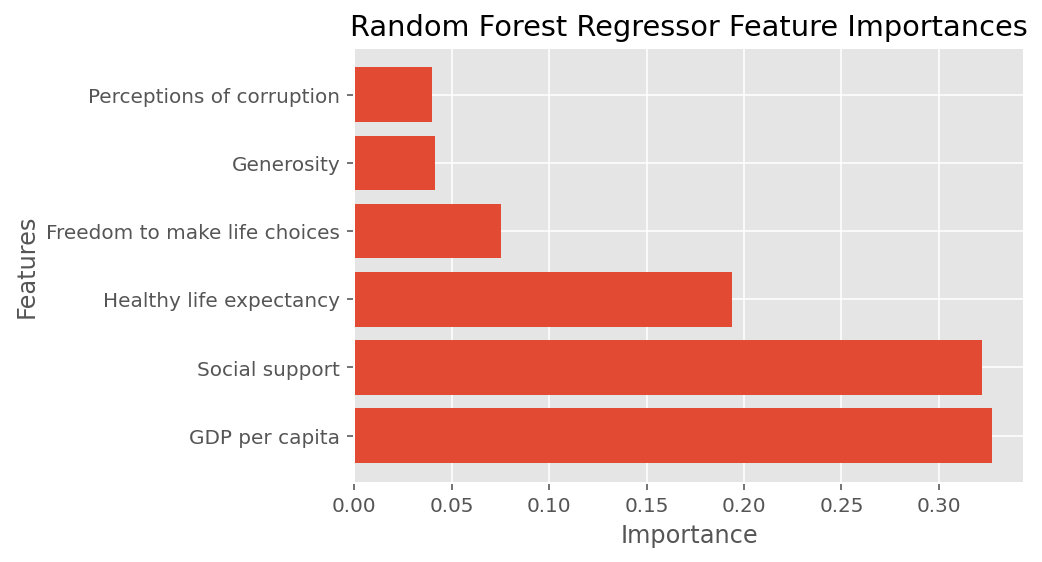

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(top_features, scores, method_name):
    plt.barh(top_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

top_features = feature_importances_df['Feature'].tolist()
scores = feature_importances_df['Importance'].tolist()

plot_imp(top_features, scores, "Random Forest Regressor")


We observe that the most important features are Social support, GDP per capita and Healthy life expectancy, f. It is coherent with what we found in the data visualization part.

### Data Sampling & Train-Test Splitting

The original dataset has 467 rows, Which is NOT a lot. So, don't have to perform Data sampling.
We Split this dataset into train and test partitions with a 70:30 ratio using stratification.

In [13]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)


In [14]:
# from this point forward, we will only work with the selected features
X_train_fs = X_train.iloc[:, top_indices]
X_test_fs = X_test.iloc[:, top_indices]


In [15]:
print(X_train_fs.shape)
print(X_test_fs.shape)

(326, 3)
(141, 3)


In [16]:
type(X_train_fs)
type(X_test_fs)

pandas.core.frame.DataFrame

### Model Fitting and Tunning <a id='mft'></a>

Here, in this "fitting and tuning" part, as our target can take continuous values, we will obviously use regression algorithms and not classification. Therefore, for our "scoring_metric" we will take metrics adapted to regression, more precisely, we have chosen the mean square error. Moreover, we know that here the best score will correspond to the smallest error, but if we take "mean_squared_error" as a metric and we ask for the best score, the function will return the biggest result and therefore the biggest error. For that, we will use "neg_mean_squared_error" which will return all the negative results and thus the function of the best score will return the score closest to zero which will correspond to the smallest error.

#### K Neighbors Regressor

In [17]:
from sklearn.model_selection import KFold, GridSearchCV
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
import matplotlib.pyplot as plt

cv_method_train = KFold(n_splits=5, shuffle=True, random_state=999)

In [18]:
# KNeighborsRegressor
params_KNN = {'n_neighbors': [1, 5, 10, 15, 20, 25, 30], 'p': [1, 2]}

In [19]:
gs_KNN = GridSearchCV(estimator=KNeighborsRegressor(),
                      param_grid=params_KNN,
                      cv=cv_method_train,
                      verbose=1,
                      scoring='neg_mean_squared_error')

gs_KNN.fit(X_train_fs, y_train)


Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=999, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 5, 10, 15, 20, 25, 30],
                         'p': [1, 2]},
             scoring='neg_mean_squared_error', verbose=1)

In [20]:
best_params_KNN = gs_KNN.best_params_
best_params_KNN

{'n_neighbors': 10, 'p': 2}

In [21]:
best_score_KNN = gs_KNN.best_score_
best_score_KNN

-0.2811694926719538

We observe that the optimal KNN model has a mean squared value error of 0.281. The best performing KNN is using 3 features with 10 nearest neighbors and  p=2 , which is the Eucledian distance.

In [22]:
mean_test_score_KNN = gs_KNN.cv_results_['mean_test_score']
mean_test_score_KNN

array([-0.54020309, -0.48588546, -0.29434719, -0.30359209, -0.2864442 ,
       -0.28116949, -0.29394476, -0.28919053, -0.28921277, -0.29204624,
       -0.29395901, -0.29759961, -0.30226473, -0.30084288])

In [23]:
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score'] = mean_test_score_KNN
results_KNN['metric'] = results_KNN['p'].replace([1, 2], ["Manhattan", "Euclidean"])

In [24]:
results_KNN

,n_neighbors,p,test_score,metric
0,1,1,-0.540203,Manhattan
1,1,2,-0.485885,Euclidean
2,5,1,-0.294347,Manhattan
3,5,2,-0.303592,Euclidean
4,10,1,-0.286444,Manhattan
5,10,2,-0.281169,Euclidean
6,15,1,-0.293945,Manhattan
7,15,2,-0.289191,Euclidean
8,20,1,-0.289213,Manhattan
9,20,2,-0.292046,Euclidean


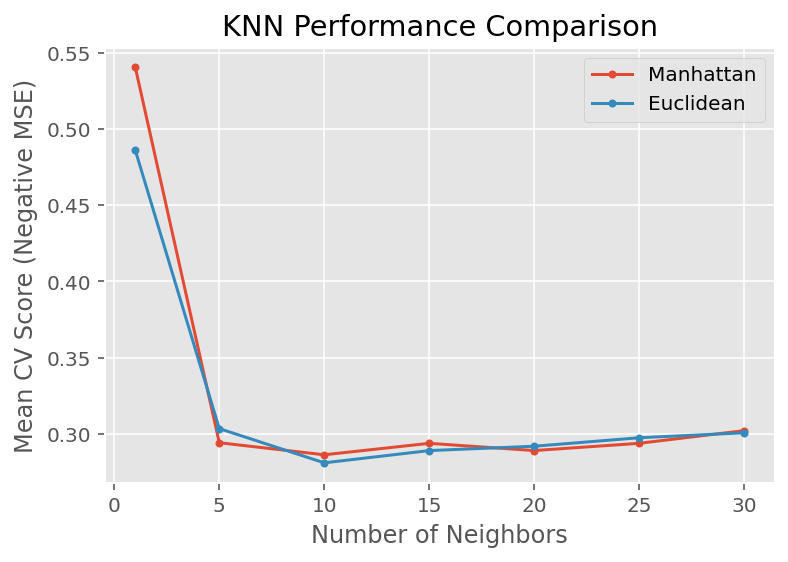

In [25]:
for i in ["Manhattan", "Euclidean"]:
    temp = results_KNN[results_KNN['metric'] == i]
    plt.plot(temp['n_neighbors'], -temp['test_score'], marker='.', label=i)

plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel("Mean CV Score (Negative MSE)")
plt.title("KNN Performance Comparison")
plt.show()

Here we find the result found with the best_score and best_params functions but we also see that many different combinations give us a squared error close to the one with the best score.

#### DecisionTreeRegressor

In [26]:
# DecisionTreeRegressor
params_DT = {'max_depth': [3, 5, 7, 10, 12],
             'min_samples_split': [2, 5, 15, 20, 25]}

gs_DT = GridSearchCV(estimator=DecisionTreeRegressor(random_state=999),
                     param_grid=params_DT,
                     cv=cv_method_train,
                     verbose=1,
                     scoring='neg_mean_squared_error')

gs_DT.fit(X_train_fs, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=999, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=999),
             param_grid={'max_depth': [3, 5, 7, 10, 12],
                         'min_samples_split': [2, 5, 15, 20, 25]},
             scoring='neg_mean_squared_error', verbose=1)

In [27]:
best_params_DT = gs_DT.best_params_
best_params_DT

{'max_depth': 5, 'min_samples_split': 2}

In [28]:
best_score_DT = gs_DT.best_score_
best_score_DT

-0.39416623967125847

We observe that the optimal DT model has a mean squared value error of 0.395. The best performing DT is using 3 features with 5 as maximum depth and 15 for the minimum sample split.

In [29]:
results_DT = pd.DataFrame(gs_DT.cv_results_['params'])
results_DT['test_score'] = gs_DT.cv_results_['mean_test_score']
results_DT.columns

Index(['max_depth', 'min_samples_split', 'test_score'], dtype='object')

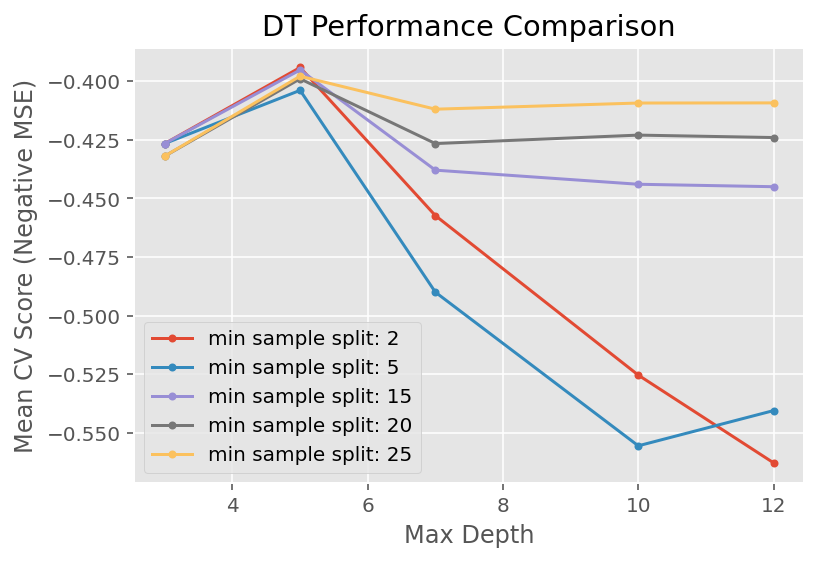

In [30]:
for i in [2, 5, 15, 20, 25]:
    temp = results_DT[results_DT['min_samples_split'] == i]
    temp_average = temp.groupby('max_depth').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker='.', label='min sample split: ' + str(i))

plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score (Negative MSE)")
plt.title("DT Performance Comparison")
plt.show()

Here once again, we find the result found with the best_score and best_params functions but we also see that some combinations give us a squared error close to the one with the best score when the minimum sample split is equal to 20 and 25.

#### Random Forest Regressor

In [31]:
# RandomForestRegressor
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings("ignore", category=DataConversionWarning)

params_RF = {'n_estimators': [100, 250, 500],
             'max_depth': [5, 7, 10, 12]}

gs_RF = GridSearchCV(estimator=RandomForestRegressor(random_state=999),
                     param_grid=params_RF,
                     cv=cv_method_train,
                     verbose=1,
                     n_jobs=-2,
                     scoring='neg_mean_squared_error')

gs_RF.fit(X_train_fs, y_train.values.ravel())

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=999, shuffle=True),
             estimator=RandomForestRegressor(random_state=999), n_jobs=-2,
             param_grid={'max_depth': [5, 7, 10, 12],
                         'n_estimators': [100, 250, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [32]:
best_params_RF = gs_RF.best_params_
best_params_RF

{'max_depth': 5, 'n_estimators': 500}

In [33]:
best_score_RF = gs_RF.best_score_
best_score_RF

-0.28654536395798347

We observe that the optimal RF model has a mean squared value error of 0.286. The best performing RF is using 3 features with 5 as maximum depth and 500 estimators.

In [34]:
results_RF = pd.DataFrame(gs_RF.cv_results_['params'])
results_RF['test_score'] = gs_RF.cv_results_['mean_test_score']
results_RF.columns

Index(['max_depth', 'n_estimators', 'test_score'], dtype='object')

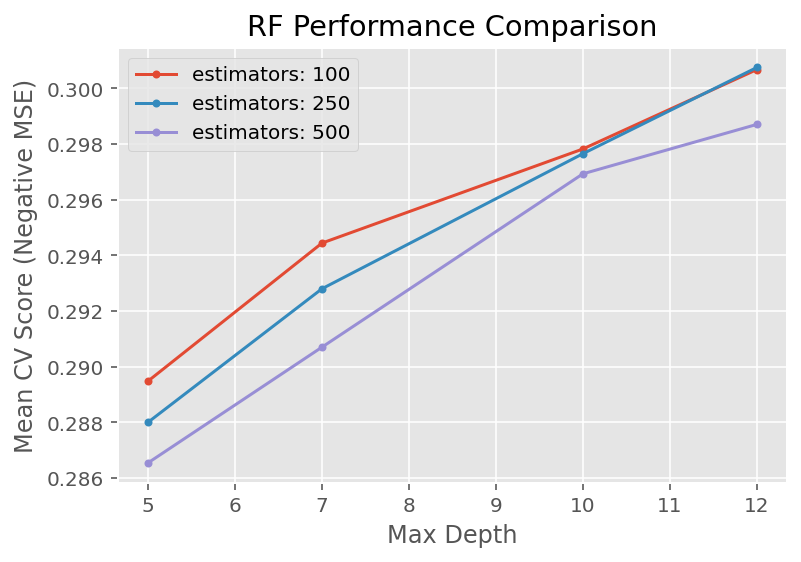

In [35]:
for i in results_RF['n_estimators'].unique():
    temp = results_RF[results_RF['n_estimators'] == i]
    plt.plot(temp['max_depth'], -temp['test_score'], marker='.', label='estimators: ' + str(i))

plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score (Negative MSE)")
plt.title("RF Performance Comparison")
plt.show()

Here, no debate possible, we find the best results for the mean square error with 500 estimators because we notice that the two other curves for 250 and 100 estimators are well above the first. Moreover we find a max depth of 5 for the optimal result.

#### Extra Tree Regressor

In [36]:
# ExtraTreeRegressor
params_ET = {'n_estimators': [100, 250, 500],
             'max_depth': [5, 7, 10, 12]}

gs_ET = GridSearchCV(estimator=ExtraTreesRegressor(random_state=999),
                     param_grid=params_ET,
                     cv=cv_method_train,
                     verbose=1,
                     n_jobs=-2,
                     scoring='neg_mean_squared_error')

gs_ET.fit(X_train_fs, y_train.values.ravel())

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=999, shuffle=True),
             estimator=ExtraTreesRegressor(random_state=999), n_jobs=-2,
             param_grid={'max_depth': [5, 7, 10, 12],
                         'n_estimators': [100, 250, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [37]:
best_params_ET = gs_ET.best_params_
best_params_ET

{'max_depth': 7, 'n_estimators': 250}

In [38]:
best_score_ET = gs_ET.best_score_
best_score_ET

-0.264248892475128

We observe that the optimal ET model has a mean squared value error of 0.264. The best performing ET is using 3 features with 7 as maximum depth and 500 estimators.

In [39]:
results_ET = pd.DataFrame(gs_ET.cv_results_['params'])
results_ET['test_score'] = gs_ET.cv_results_['mean_test_score']
results_ET.columns

Index(['max_depth', 'n_estimators', 'test_score'], dtype='object')

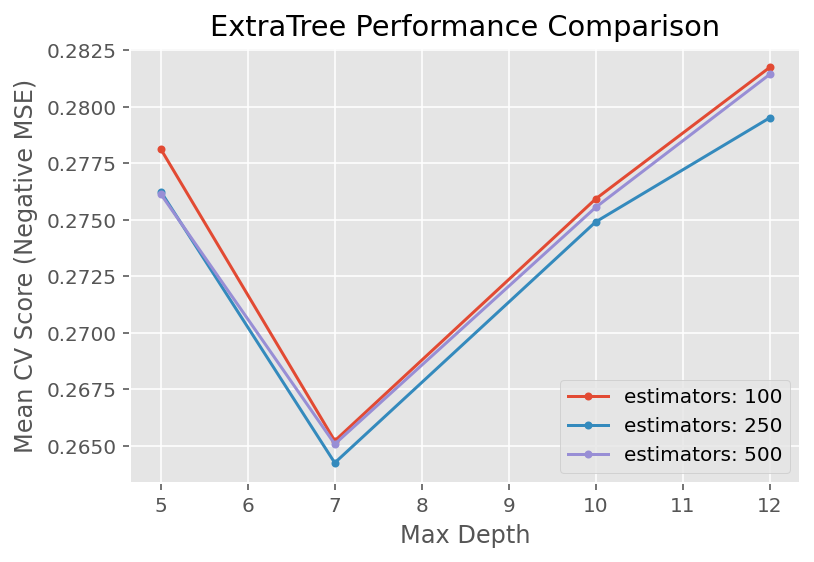

In [40]:
for i in results_ET['n_estimators'].unique():
    temp = results_ET[results_ET['n_estimators'] == i]
    plt.plot(temp['max_depth'], -temp['test_score'], marker='.', label='estimators: ' + str(i))

plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score (Negative MSE)")
plt.title("ExtraTree Performance Comparison")
plt.show()

Here we find that the best results for the mean square error are associated with a max depth of 7. However, once again, the curve for 500 estimators is below the others so it is this single combination that gives the best result.

#### Gradient Boosting

In [41]:
params_GB = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7, 10, 12]
}

In [42]:
gs_GB = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=999),
    param_grid=params_GB,
    cv=cv_method_train,
    verbose=1,
    scoring='neg_mean_squared_error'
)

gs_GB.fit(X_train_fs, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=999, shuffle=True),
             estimator=GradientBoostingRegressor(random_state=999),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7, 10, 12],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error', verbose=1)

In [43]:
best_params_GB = gs_GB.best_params_
best_params_GB

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [44]:
best_score_GB = gs_GB.best_score_
best_score_GB

-0.290760619963808

We observe that the optimal ET model has a mean squared value error of 0.291. The best performing GB is using 3 features with 0.1 for the learning rate, 3 as maximum depth and 500 estimators.

In [45]:
results_GB = pd.DataFrame(gs_GB.cv_results_['params'])
results_GB['test_score'] = gs_GB.cv_results_['mean_test_score']
results_GB.columns

Index(['learning_rate', 'max_depth', 'n_estimators', 'test_score'], dtype='object')

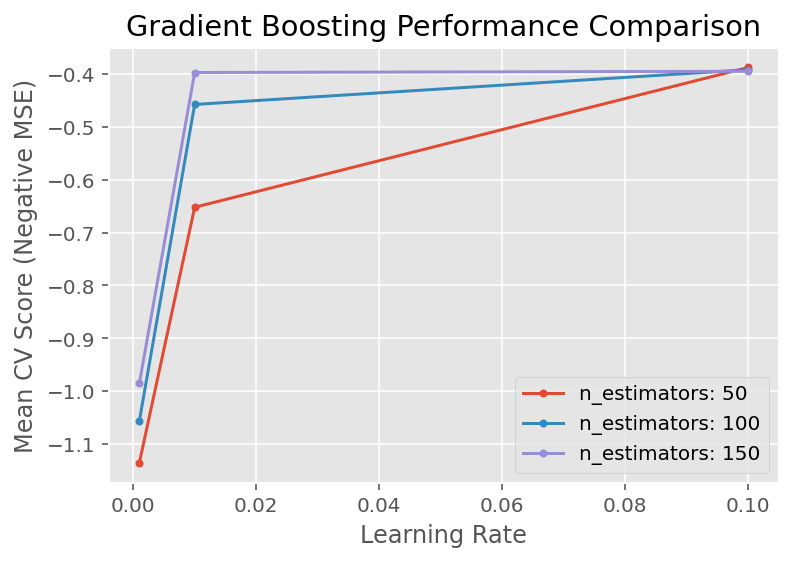

In [46]:
for i in [50, 100, 150]:
    temp = results_GB[results_GB['n_estimators'] == i]
    temp_average = temp.groupby('learning_rate').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker='.', label='n_estimators: ' + str(i))

plt.legend()
plt.xlabel('Learning Rate')
plt.ylabel("Mean CV Score (Negative MSE)")
plt.title("Gradient Boosting Performance Comparison")
plt.show()

Here, the case where we have 50 estimators and a learning rate of 0.1 is undoubtedly the best, we see that the other curves are above the first.

### Model comparison <a id='mcp'></a>

During the hyper-parameter tuning phase above, we used the 326 rows in our training data within a cross-validation framework and we determined the best hyper-parameter values for each of the three classifiers. For instance, for KNN, it turned out that the best set of hyper-parameter values is  k=10
  and  p=2
  with the best 3 features as selected by the RFI feature selection method.

What we would like to do now is to "fit" each tuned classifier (with the best set of hyper-parameter values) on the 141 rows in the test data in a cross-validated fashion to figure out which (tuned) classifier performs the best. This way, we would be measuring performance of the tuned classifiers on data that they did not "see" previously.


### KNN vs. DT vs. RF vs. ET vs. GB 

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


cv_method_test = KFold(n_splits=5, shuffle=True, random_state=999)

mse_scores_KNN = -cross_val_score(gs_KNN.best_estimator_, 
                              X_test_fs, 
                              y_test,
                              cv=cv_method_test,
                              scoring='neg_mean_squared_error')

mean_mse_KNN = mse_scores_KNN.mean()

print("Mean Squared Error:", mean_mse_KNN)

Mean Squared Error: 0.2903768776802268


In [49]:
cv_method_test = KFold(n_splits=5, shuffle=True, random_state=999)

mse_scores_DT = -cross_val_score(gs_DT.best_estimator_, 
                              X_test_fs, 
                              y_test,
                              cv=cv_method_test,
                              scoring='neg_mean_squared_error')

mean_mse_DT = mse_scores_DT.mean()

print("Mean Squared Error:", mean_mse_DT)

Mean Squared Error: 0.39173868123783395


In [50]:
cv_method_test = KFold(n_splits=5, shuffle=True, random_state=999)

mse_scores_RF = -cross_val_score(gs_RF.best_estimator_, 
                              X_test_fs, 
                              y_test,
                              cv=cv_method_test,
                              scoring='neg_mean_squared_error')

mean_mse_RF = mse_scores_RF.mean()

print("Mean Squared Error:", mean_mse_RF)

Mean Squared Error: 0.26965087164728574


In [51]:
cv_method_test = KFold(n_splits=5, shuffle=True, random_state=999)

mse_scores_ET = -cross_val_score(gs_ET.best_estimator_, 
                              X_test_fs, 
                              y_test,
                              cv=cv_method_test,
                              scoring='neg_mean_squared_error')

mean_mse_ET = mse_scores_ET.mean()

print("Mean Squared Error:", mean_mse_ET)

Mean Squared Error: 0.2649599504106062


In [52]:
cv_method_test = KFold(n_splits=5, shuffle=True, random_state=999)

mse_scores_GB = -cross_val_score(gs_GB.best_estimator_,
                                X_test_fs,
                                y_test,
                                cv=cv_method_test,
                                scoring='neg_mean_squared_error')

mean_mse_GB = mse_scores_GB.mean()

print("Mean Squared Error:", mean_mse_GB)

Mean Squared Error: 0.29500099144711356


In [53]:
# Calculate predictions for each model
predictions_KNN = gs_KNN.best_estimator_.predict(X_test_fs)
predictions_RF = gs_RF.best_estimator_.predict(X_test_fs)
predictions_DT = gs_DT.best_estimator_.predict(X_test_fs)
predictions_ET = gs_ET.best_estimator_.predict(X_test_fs)
predictions_GB = gs_GB.best_estimator_.predict(X_test_fs)

In [54]:
# Calculate R² for each model
r2_KNN = r2_score(y_test, predictions_KNN)
r2_RF = r2_score(y_test, predictions_RF)
r2_DT = r2_score(y_test, predictions_DT)
r2_ET = r2_score(y_test, predictions_ET)
r2_GB = r2_score(y_test, predictions_GB)

In [55]:
# Calculate RMSE for each model
rmse_KNN = mean_squared_error(y_test, predictions_KNN, squared=False)
rmse_RF = mean_squared_error(y_test, predictions_RF, squared=False)
rmse_DT = mean_squared_error(y_test, predictions_DT, squared=False)
rmse_ET = mean_squared_error(y_test, predictions_ET, squared=False)
rmse_GB = mean_squared_error(y_test, predictions_GB, squared=False)

In [56]:
# Calculate MAE for each model
mae_KNN = mean_absolute_error(y_test, predictions_KNN)
mae_RF = mean_absolute_error(y_test, predictions_RF)
mae_DT = mean_absolute_error(y_test, predictions_DT)
mae_ET = mean_absolute_error(y_test, predictions_ET)
mae_GB = mean_absolute_error(y_test, predictions_GB)

In [57]:
# Compare the performance metrics
print("K-Nearest Neighbors:")
print("R² Score:", r2_KNN)
print("RMSE:", rmse_KNN)
print("MAE:", mae_KNN)
print()

print("Random Forest:")
print("R² Score:", r2_RF)
print("RMSE:", rmse_RF)
print("MAE:", mae_RF)
print()

print("Decision Tree:")
print("R² Score:", r2_DT)
print("RMSE:", rmse_DT)
print("MAE:", mae_DT)
print()

print("Extra Trees:")
print("R² Score:", r2_ET)
print("RMSE:", rmse_ET)
print("MAE:", mae_ET)
print()

print("Gradient Boosting:")
print("R² Score:", r2_GB)
print("RMSE:", rmse_GB)
print("MAE:", mae_GB)

K-Nearest Neighbors:
R² Score: 0.8175389896721232
RMSE: 0.4899554562915978
MAE: 0.3846361588985815

Random Forest:
R² Score: 0.8234105435925
RMSE: 0.482007666217001
MAE: 0.3701630609297892

Decision Tree:
R² Score: 0.7902685610648731
RMSE: 0.5252950750396699
MAE: 0.40040163904920417

Extra Trees:
R² Score: 0.8355348368865414
RMSE: 0.465166596776958
MAE: 0.35725900579855935

Gradient Boosting:
R² Score: 0.820705770780701
RMSE: 0.4856850287867228
MAE: 0.3731620640744596


* Extra Trees and Random Forest models perform the best overall based on higher R² scores, lower RMSE, and lower MAE.
* Gradient Boosting also shows good performance.
* K-Nearest Neighbors (KNN) and Decision Tree perform relatively worse compared to the other models.

Based on these conclusions, we can consider the Extra Trees and Random Forest models as the top performers due to their higher R² scores, lower RMSE, and lower MAE.

Gradient Boosting also shows good performance, while K-Nearest Neighbors (KNN) and Decision Tree perform relatively worse compared to the other models.



## Critique & limitations (10 pts)<a id='crt'></a>

One of the largest concerns for regressor models is the violation of the assumptions which should be checked for any regression analysis. For a regressor model to be able to perform well we would expect that all of these assumptions are met or corrected before analysis takes place. In the graph below we would first check that there are some signs of a linear relationship for the features which will be used in the model. We can clearly see that there is some indication of linearity for most of the features. However, Perceptions of corruption and Generosity do appear to have a weak linear correlation but without doing any further inspection we will assume that there is a level of linearity within the data.

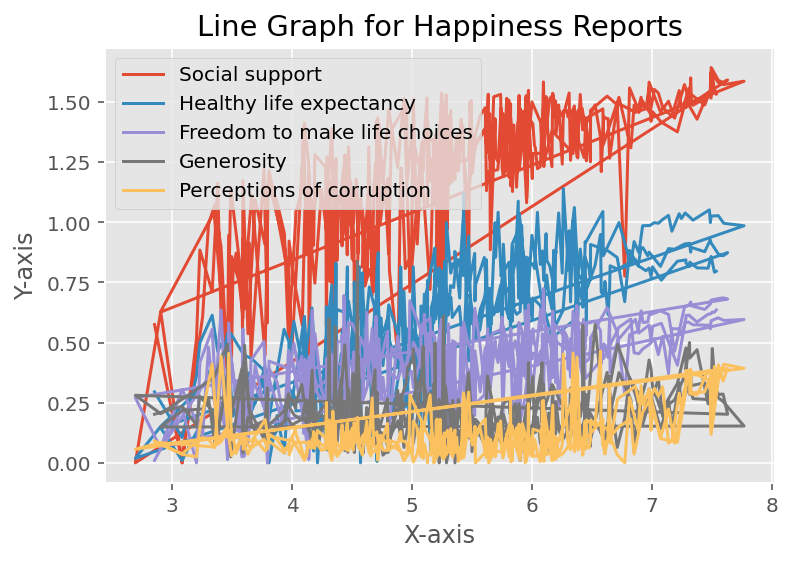

In [58]:
# Linearity
happiness = pd.read_csv('2017-2019 - 2017.csv')

drop_columns = ['Whisker.high', 'Whisker.low', 'Dystopia.Residual', 'Country, Year']
happiness = happiness.drop(columns=drop_columns)
happiness = happiness.fillna(value=0)

plt.plot(happiness['Score'], happiness['Social support'], label='Social support')
plt.plot(happiness['Score'], happiness['Healthy life expectancy'], label='Healthy life expectancy')
plt.plot(happiness['Score'], happiness['Freedom to make life choices'], label='Freedom to make life choices')
plt.plot(happiness['Score'], happiness['Generosity'], label='Generosity')
plt.plot(happiness['Score'], happiness['Perceptions of corruption'], label='Perceptions of corruption')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Graph for Happiness Reports')
plt.legend()

plt.show()

Normality of the data must also be met. We can see from the Normal Q-Q Plot that there is reasonably good normality here with most data points being close to the reference line. However, there is a high level of deviation from the reference line at the tails of the data. Although there is some deviation this can be considered as the assumption being met for the purposes of the modelling.

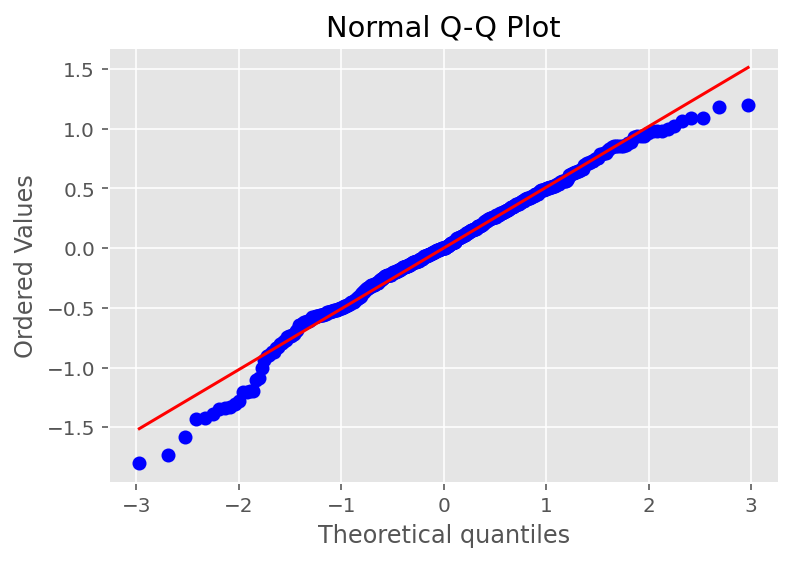

In [59]:
#Normality
X = sm.add_constant(X)  # Add a constant term to the independent variables
linear_model = sm.OLS(y, X).fit()

residuals = linear_model.resid
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()

In terms of multicollinearity there aren't severe levels of it. VIF values are generally low, ranging from 1.175 to 3.174. Although features have relatively low VIF values ranging from 1.176 to 3.174. These values indicate a moderate level of correlation but are generally within an acceptable range so the assumption is met.

In [60]:
#Multicollinearity
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                       Features       VIF
0                         const  1.000000
1                GDP per capita  3.174050
2                Social support  2.235762
3       Healthy life expectancy  2.720229
4  Freedom to make life choices  1.522897
5                    Generosity  1.175068
6     Perceptions of corruption  1.435986


Looking at the Residuals vs Predicted Values plot we can see that there is general randomness. However, there are some signs of clustering focused close to the centre. There are two points on the far left of the plot which may be considered outliers but due to the low number of data points in this dataset these should be left in. In terms of heteroscedasticity and homoscedasticity this dataset is acceptable.

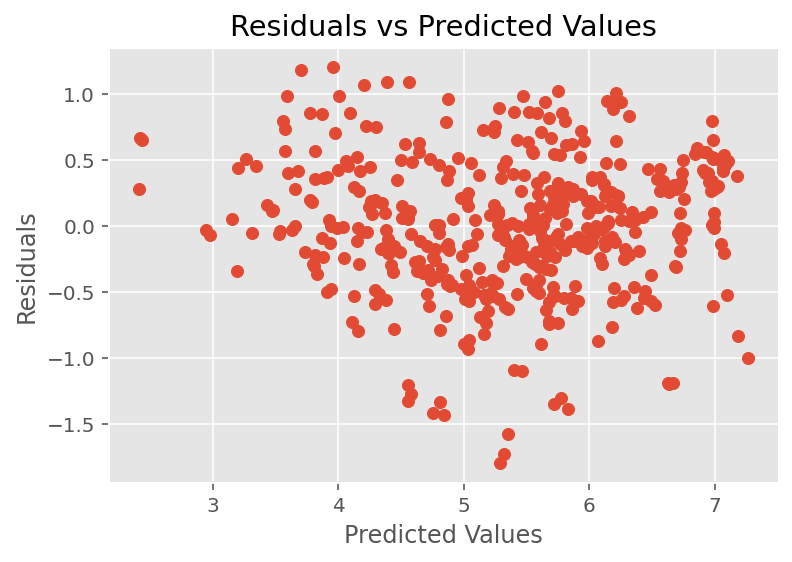

In [61]:
#Homoscedasticity
residuals = linear_model.resid
predicted = linear_model.fittedvalues
plt.scatter(predicted, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

Having reviewed all of these assumptions we would accept this dataset for the purposes of this analysis, although there are a number of other assumptions which can be tested to ensure a stable dataset before model fitting. The happiness dataset is stable enough for this model testing but there can be a significant issue for regressor models where these assumptions have not be correctly tested and corrected where needed. Creating the potential for unrealistic predictions being made, leaving the model fitting null and void. 

Supervised regression learning models typically need a large number of data points to effectively construct a model. With the data used in this machine learning model only X number of data points were available after collating data from three years worth of analysis. When regressor models are constructed and trained with a small sample sizes it can lead to overfitting and enable a high degree of generalisations to be made through the model. However, it is unlikely we will see overfitting within this model as the methodology as explain in the World Happiness Report literature is largely just built of the sum of the features scores with the residuals also being accounted for. With this knowledge it would be assumed on the most part that the higher the feature value, the higher the overall score.

Regressor models also require a complete and accurate data set in order to accurately construct a model. In the data used from 2017-2019 we see main occasions  on missing data. The most prevalent being that of Central African Republic which over all three years used to construct this model has missing data from multiple features as seen below. This lack of data consistency as well as the wholly missing values can lead to anomalies due to the noise and characterise missing or unbalanced data as outliers from the linear relationship seen in other data points. It is understandable that some data may not have been available such as the GDP but for some features such as 'social support' this metric is not easily measurable and will be decided among the authors and researchers of this report, leading to the potential of bias and causing anomalies and non-linear relationships.

Furthermore, there are a number of features such as 'Freedom to make life choices', 'social support' and 'perceptions of corruptions' which are all open to the potential of bias, due to personal or political stigmas and beliefs. The interpretation of freedom can vary across cultures, leading to biased responses. The 2022 World Happiness Report main authors are three academics based in Canada and one in Korea. With a lack of diversity and no evidence of cultural constancy. This can lead to a western bias in the perceived values assigned. This bias can lead to the model giving unrealising predictions which fit with the authors or data collectors bias.

## Project conclusions (15 pts)<a id='pc'></a>

### Project summary <a id='ps'></a>

The primary objective of this project was to examine the metrics associated with a county in calculating the happiness score based on these metrics. The project utilised data from the years 2017 to 2019, encompassing a range of variables including GDP, Social Support, Life expectancy, Freedom, Generosity and Corruption. 

The initial step involved data preprocessing to ensure data quality and relevance. In this stage, the dataset was examined, and unnecessary features were dropped (whiskey.high, whiskey.low and residuals). Features were considered irrelevant for two main reasons. Either they contained missing data as they were not assessed for every year, rendering them inconsistent for analysis, or they had little impact on the model's outcome, this was the case for the residual feature. Furthermore, as the focus of the project was on predicting happiness scores, the residuals, representing unexplained variation so were eliminated from the dataset.

To address the potential influence of outliers, a min-max scaler was used to minimise their effect. This scaling technique aimed to normalise the range of values across the dataset, reducing the impact of extreme values on the model.

Following the data preprocessing phase, the dataset was divided into a training set and a testing set using a 70 30 split respectively. This division allowed for model training on a substantial portion of the data while ensuring an independent dataset for evaluating the model's performance.

Before entering the data into the regressor models, the necessary features and target variable were defined. To ensure compatibility and fairness across different features, standardisation was used to normalise the data as well as features being tested and ranked to identify the most influential features that significantly impacted the happiness scores.

With the dataset prepared and the relevant features identified, a range of regressor models were trained and fitted. To optimise the models' performance, various tuning techniques were employed, such as hyperparameter tuning and cross-validation, to ensure the selection of the best combination of model parameters.

Once the models were trained and tuned, an analysis was conducted to evaluate their efficacy in predicting happiness scores. Performance evaluation metrics used were the R-squared value, root mean squared error (RMSE), and mean absolute error (MAE). These were used to assess the accuracy and predictive quality of each model. These metrics allowed for a thorough and comprehensive summary and comparison allowing for selection of the best-performing model for predicting happiness scores.

This project employed a systematic approach using data preprocessing, feature selection, model development, tuning, and performance evaluation. This comprehensive workflow allowed for the identification and selection of the most suitable machine learning model for accurately predicting happiness scores based on the available metrics.

### Summary of findings <a id='sf'></a>

Using R², MAE, and RMSE metrics, the performance of the trained regressor models was checked. Each of the five models exhibits a satisfactory level of variance explanation. The R² values for all models range from 0.79 to 0.84, indicating that these models were responsible for approximately 79% to 84% of the observed variance in the data. The Extra Tree Regressor model was the top performing model with an R² value of 0.838, showing that this model with this specific tuning configuration was able to explain 83.3% of the variance.

For RMSE, the values range between 0.46 and 0.52, with the Extra Tree model showing a significantly lower score than the other models. The Extra Tree model has a RMSE of 0.4609, with the next closest RMSE value jumping up to 0.4817. This pronounced difference highlights the high level of performance in the Extra Tree model in comparison to the other models. Conversely, the Decision Tree model performs notably worse, with an RMSE of 0.5197, significantly higher than the RMSE of the other three models, which range from 0.48 to 0.49.

Looking at MAE, the Extra Tree model once again showed the best performance with an MAE of 0.355. While the MAE values generated by the models are relatively close, indicating overall acceptable performance, the Decision Tree Regressor model consistently underperforms, yielding an MAE of 0.3956.

Overall, although most of the models deliver satisfactory results, the Extra Tree model stands out as the top performer, exhibiting superior evaluation metrics across all three metrics. The Random Forest model also demonstrates commendable performance. Meanwhile, both the K-Nearest Neighbours Regressor model and the Gradient Boosting Regressor model perform adequately. Unfortunately, the Decision Tree Regressor model consistently ranks as the weakest performer across all tests, rendering it unsuitable for predictive modelling purposes for the happiness report data.You can see an example of 10 predictions using the Extra Tree Regressor model with the correct score from the original dataset in appendix 1. 

### Conclusions <a id='cc'></a>

Based on the findings of the analysis, it can be concluded that the Extra Tree Regressor model outperformed all the other models in predicting the Happiness score based on the metrics used by the World Happiness Report. The model exhibited a high level of variance explanation, with an R² value of 0.838, indicating that it could explain approximately 83.3% of the variance in the data. Additionally, the Extra Tree model demonstrated significantly lower RMSE and MAE values compared to the other models, further highlighting its superior performance.The accuracy of the model is further demonstrated through the prediction produced which can be found in appendix 1. 

The objective for this project was to be able to accuretly predict the Happiness score for countries based on metrics used by the world happiness report. Through the modelling of a variety of regressor machine learning models the objective has been successfully achieved. With the extra tree model being able to adequetly predict the score for the test countries.

Appendix 1 showcases an example of 10 predictions using the Extra Tree Regressor model, juxtaposing the predicted scores with the correct scores from the original dataset. This demonstrates the model's ability to generate meaningful predictions aligned with the actual values. Appendix 2 shows the full array of predictions produced by the extra tree regressor model. 

Overall, the project's outcomes highlight the quality and validity of regression models and evaluating their performance metrics to achieve accurate predictions of the Happiness score based on the provided metrics.

# Apprendix

Appendix 1: Complete predictions and original scores

In [64]:
ET_model = ExtraTreesRegressor()
ET_model.fit(X_train, y_train)
ET_predictions = ET_model.predict(X_test)

for i in range(10):
    predicted_score = ET_predictions[i]
    correct_score = y_test.iloc[i]

    print(f"Predicted Score: {predicted_score}")
    print(f"Correct Score: {correct_score}")
    print("------------------")

Predicted Score: 6.144210017110001
Correct Score: Score    6.454
Name: 27, dtype: float64
------------------
Predicted Score: 6.309720003660005
Correct Score: Score    6.31
Name: 190, dtype: float64
------------------
Predicted Score: 4.17374999753
Correct Score: Score    3.933
Name: 453, dtype: float64
------------------
Predicted Score: 5.561430008280006
Correct Score: Score    5.603
Name: 380, dtype: float64
------------------
Predicted Score: 6.652009995629997
Correct Score: Score    6.726
Name: 332, dtype: float64
------------------
Predicted Score: 4.270029992809999
Correct Score: Score    4.286
Name: 444, dtype: float64
------------------
Predicted Score: 4.692569989329998
Correct Score: Score    4.657
Name: 262, dtype: float64
------------------
Predicted Score: 6.076790001569998
Correct Score: Score    6.711
Name: 175, dtype: float64
------------------
Predicted Score: 7.21388999166
Correct Score: Score    7.343
Name: 317, dtype: float64
------------------
Predicted Score: 5.4

Appendix 2: A full array of all predicted values produced by the Extra Tree Regressor Model

In [65]:
print(ET_predictions)

[6.14421002 6.30972    4.17375    5.56143001 6.65201    4.27002999
 4.69256999 6.07679    7.21388999 5.48472003 5.79194    4.76514999
 4.22067001 4.70167002 5.11639001 5.56804    4.11505    6.31910002
 4.27393    4.81135002 4.85127003 4.08595001 6.43016001 4.79043001
 6.39359998 3.82018994 4.69919998 6.04156    5.27093999 4.95973003
 5.93797001 5.61298004 6.25306    5.41753    4.74165998 4.31333998
 7.33382002 3.36559    3.73289    5.89776001 5.17208001 5.25293003
 4.64892005 5.89518    4.17543002 4.15944997 5.51365003 4.73914002
 3.00517998 6.64086999 6.39750996 3.48958    4.67990002 3.61959001
 6.97671006 5.34815    5.74536    6.14276    5.52008998 6.22061002
 4.74606    5.85079003 6.12645    4.55115    5.5909     5.1116
 6.76956    5.72175002 4.75373    5.03624001 6.58380001 5.63000998
 6.06626    4.65756998 6.07046    4.07416001 5.35534    5.85435002
 4.93689002 5.22185993 4.73858    7.04725002 4.56063    5.51481002
 4.60257004 4.78368001 5.55552003 5.86631003 5.53812999 4.10683
 6